# Data Augmentation

In this lab, you will develop a data augmentation.

In [ ]:
import tensorflow as tf
#tf.config.list_physical_devices('GPU')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# portions of this lab were taken from Deep Learning with Python

import glob
import os
import random
import shutil

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import *

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
NSAMPLES = 1000

dataset_dir = "drive/MyDrive"

train_dir = dataset_dir + "/train"

train_dogs = glob.glob(train_dir + "/dog*.*")
train_cats = glob.glob(train_dir + "/cat*.*")

sampled_train_dir = dataset_dir + "/s_train"
sampled_valid_dir = dataset_dir + "/s_valid"
sampled_test_dir = dataset_dir + "/s_test"

In [ ]:
try:
    shutil.rmtree(sampled_train_dir)
    shutil.rmtree(sampled_valid_dir)
    shutil.rmtree(sampled_test_dir)
except:
    pass

os.mkdir(sampled_train_dir)
os.mkdir(sampled_valid_dir)
os.mkdir(sampled_test_dir)

os.mkdir(sampled_train_dir + "/dogs")
os.mkdir(sampled_train_dir + "/cats")

os.mkdir(sampled_valid_dir + "/dogs")
os.mkdir(sampled_valid_dir + "/cats")

os.mkdir(sampled_test_dir + "/dogs")
os.mkdir(sampled_test_dir + "/cats")

random.shuffle(train_dogs)
random.shuffle(train_cats)

for fn in train_dogs[0:NSAMPLES]:
    src = fn
    dst = sampled_train_dir + "/dogs/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_cats[0:NSAMPLES]:
    src = fn
    dst = sampled_train_dir + "/cats/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_dogs[NSAMPLES:NSAMPLES + NSAMPLES//2]:
    src = fn
    dst = sampled_valid_dir + "/dogs/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_cats[NSAMPLES:NSAMPLES + NSAMPLES//2]:
    src = fn
    dst = sampled_valid_dir + "/cats/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

print("... generated directories s_train, s_valid and s_test")

... generated directories s_train, s_valid and s_test


In [ ]:
for fn in train_dogs[NSAMPLES + NSAMPLES//2:2*NSAMPLES]:
    src = fn
    dst = sampled_test_dir + "/dogs/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_cats[NSAMPLES + NSAMPLES//2:2*NSAMPLES]:
    src = fn
    dst = sampled_test_dir + "/cats/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

print("... generated directory s_test")

... generated directory s_test


Now you will create a model to learn now to differentiate between cats and dogs.

In [ ]:
def get_model():
    x = x_in = Input((150,150,3), name="input")
    x = Conv2D(32, (5,5), padding="valid",  name="fe0")(x)
    x = Activation("gelu", name="r0")(x)
    x = MaxPooling2D(2,2,name="mp0")(x)
    x = Conv2D(64, (3,3), padding="valid", name="fe1")(x)
    x = Activation("gelu", name="r1")(x)
    x = MaxPooling2D(2,2,name="mp1")(x)
    x = Conv2D(128, (3,3), padding="valid", name="fe2")(x)
    x = Activation("gelu", name="r2")(x)
    x = MaxPooling2D(2,2,name="mp2")(x)
    x = Conv2D(128, (3,3), padding="valid", name="fe3")(x)
    x = Activation("gelu", name="r3")(x)
    x = MaxPooling2D(2,2,name="mp3")(x)
    x = Flatten(name="fl")(x)
    x = Dropout(0.5, name="d5")(x)
    x = Dense(512, name="d1", activation="swish")(x)
    x = Dense(1, name="d2")(x)
    x = Activation("sigmoid", name="s1")(x)
    m = Model(inputs=x_in, outputs=x, name='mymodel')
    m.summary()

    return m

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
# adam = Adam(learning_rate=0.001)

model = get_model()
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

Model: "mymodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fe0 (Conv2D)                         │ (None, 146, 146, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r0 (Activation)                      │ (None, 146, 146, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp0 (MaxPooling2D)                   │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fe1 (Conv2D)                         │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r1 (Activation)                      │ (None, 71, 71, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp1 (MaxPooling2D)                   │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fe2 (Conv2D)                         │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r2 (Activation)                      │ (None, 33, 33, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp2 (MaxPooling2D)                   │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fe3 (Conv2D)                         │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r3 (Activation)                      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp3 (MaxPooling2D)                   │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fl (Flatten)                         │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d5 (Dropout)                         │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d1 (Dense)                           │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d2 (Dense)                           │ (None, 1)                   │             513 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ s1 (Activation)                      │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,657 (13.18 MB)

 Trainable params: 3,454,657 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(model.get_layer('d1').get_weights()[0].shape, model.get_layer('d1').get_weights()[1].shape)

(6272, 512) (512,)


In [ ]:
import numpy as np
for layer in model.layers:
    if isinstance(layer, Dense) or isinstance(layer, Conv2D):
        print(layer.name, np.min(layer.get_weights()[0]), np.max(layer.get_weights()[0]))

fe0 -0.082713455 0.08279942
fe1 -0.08332753 0.08332928
fe2 -0.058925286 0.05892433
fe3 -0.051029626 0.05102925
d1 -0.029739426 0.029739426
d2 -0.10800794 0.10770511


 Now you will create an image generator and train this set.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# sample_train_dir = 'dogs' + 'cats'

train_generator = train_datagen.flow_from_directory(
    sampled_train_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

valid_generator = valid_datagen.flow_from_directory(
    sampled_valid_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

test_generator = test_datagen.flow_from_directory(
    sampled_test_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In order for you to look at the generator, lets print the shapes of what it generates.

data_batch: (100, 150, 150, 3)
labels_batch: (100,)
labels: [0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0.]
[[[0.6627451  0.70980394 0.69411767]
  [0.7019608  0.7411765  0.7490196 ]
  [0.73333335 0.75294125 0.77647066]
  ...
  [0.34117648 0.31764707 0.27058825]
  [0.3254902  0.3019608  0.25490198]
  [0.3254902  0.30980393 0.26666668]]

 [[0.68235296 0.72156864 0.7254902 ]
  [0.7176471  0.7490196  0.7607844 ]
  [0.74509805 0.76470596 0.77647066]
  ...
  [0.3529412  0.32941177 0.28235295]
  [0.34509805 0.32156864 0.27450982]
  [0.32156864 0.30588236 0.2627451 ]]

 [[0.7058824  0.7254902  0.7490196 ]
  [0.77647066 0.79215693 0.80392164]
  [0.8235295  0.8352942  0.8078432 ]
  ...
  [0.35686275 0.33333334 0.28627452]
  [0.34117648 0.3176

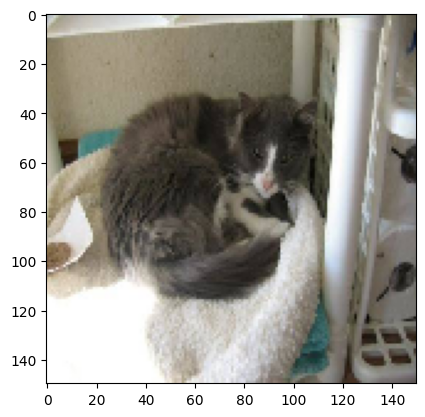

In [ ]:
for data_batch, labels_batch in train_generator:
    print("data_batch:", data_batch.shape)
    print("labels_batch:", labels_batch.shape)
    print("labels:", labels_batch)
    print(data_batch[0])
    plt.imshow(data_batch[0])
    plt.show()
    break

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=2*NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//100)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 719ms/step - acc: 0.5282 - loss: 0.6967 - val_acc: 0.5470 - val_loss: 0.6808
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 628ms/step - acc: 0.5511 - loss: 0.6873 - val_acc: 0.5870 - val_loss: 0.6710
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 626ms/step - acc: 0.6010 - loss: 0.6618 - val_acc: 0.6140 - val_loss: 0.6574
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 663ms/step - acc: 0.6449 - loss: 0.6362 - val_acc: 0.6570 - val_loss: 0.6326
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 645ms/step - acc: 0.6677 - loss: 0.6136 - val_acc: 0.6530 - val_loss: 0.6103
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 635ms/step - acc: 0.6728 - loss: 0.5962 - val_acc: 0.6520 - val_loss: 0.6244
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 631ms/step - acc: 0.7095 - loss: 0.5628 - val_acc: 0.6770 - val_loss: 0.5983
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 625ms/step - acc: 0.7062 - loss: 0.5539 - val_acc: 0.6820 - val_loss: 0.5971
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 625ms/

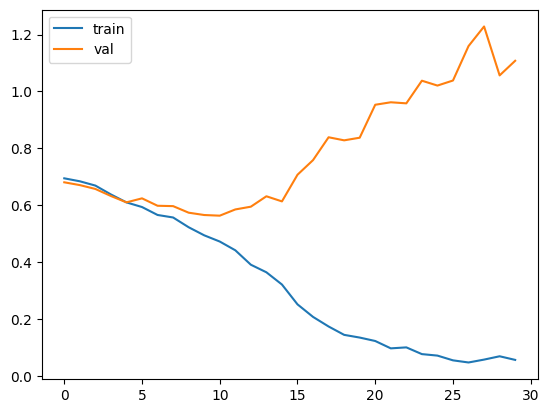

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

Train accuracy:  0.9800000190734863
Validation accuracy:  0.7229999899864197
Test accuracy: 
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step - acc: 0.6943 - loss: 1.3091


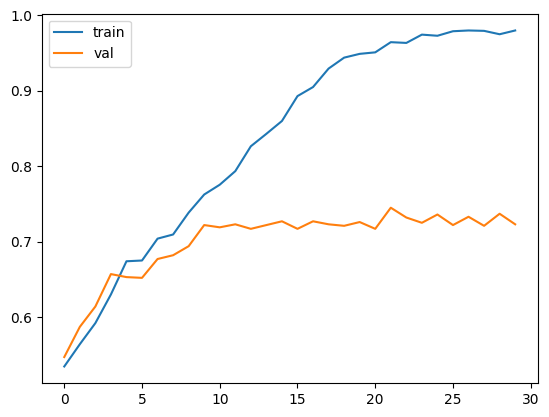

In [ ]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
print("Train accuracy: ", history.history['acc'][-1])
print("Validation accuracy: ", history.history['val_acc'][-1])
print("Test accuracy: ", end="\n")
test_acc = model.evaluate(test_generator)
plt.legend()

Not very good for the effort we did. We can try to use data augmentation by rotating, shifting, fliping, and shearing the image.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40, # between 0 and 180 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest")

drive/MyDrive/train/dog.9835.jpg


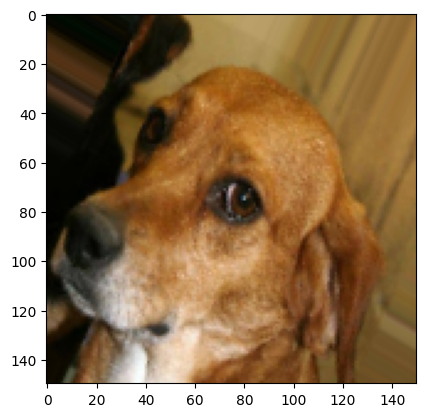

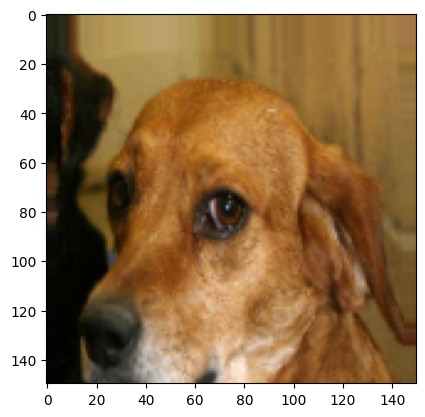

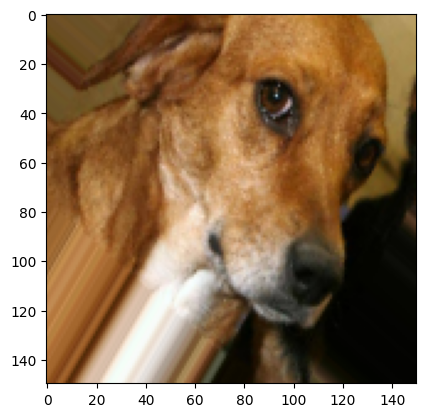

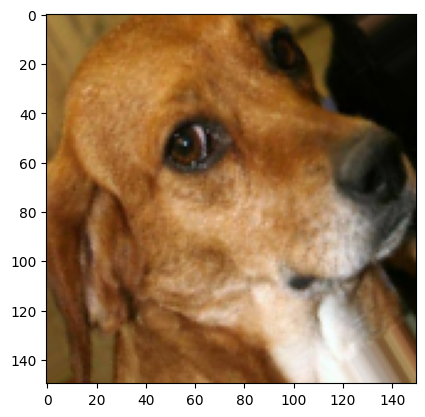

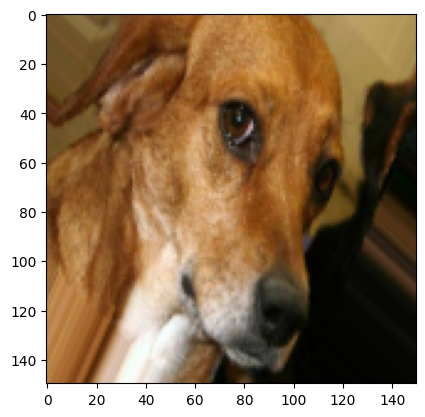

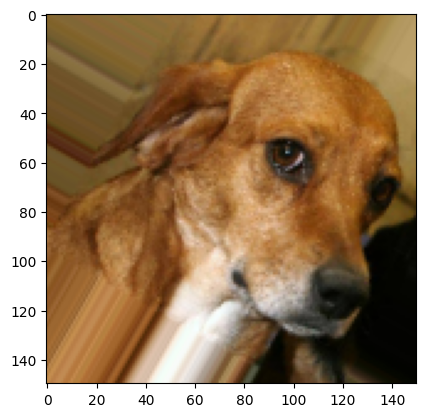

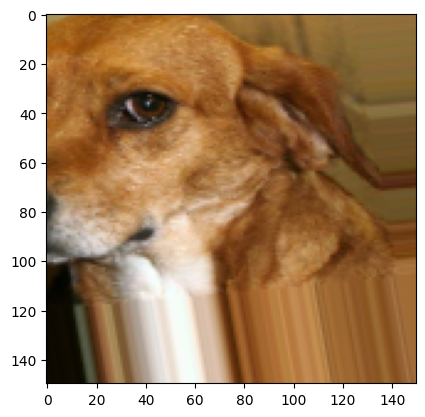

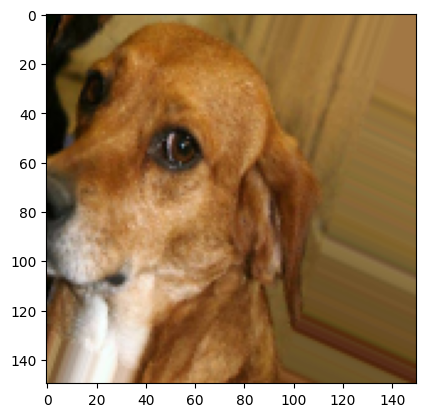

In [ ]:
# let's see some of images

from tensorflow.keras.preprocessing import image

fname = train_dogs[0]

img = image.load_img(fname, target_size=(150, 150))

plt.imshow(img)
print(fname)

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 8 == 0:
        break
plt.show()

Let's see now if we can get better result.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    sampled_train_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

valid_generator = valid_datagen.flow_from_directory(
    sampled_valid_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

adam = tf.optimizers.Adam(learning_rate=0.001)

model = get_model()
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model: "mymodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fe0 (Conv2D)                         │ (None, 146, 146, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r0 (Activation)                      │ (None, 146, 146, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp0 (MaxPooling2D)                   │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fe1 (Conv2D)                         │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r1 (Activation)                      │ (None, 71, 71, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp1 (MaxPooling2D)                   │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fe2 (Conv2D)                         │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r2 (Activation)                      │ (None, 33, 33, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp2 (MaxPooling2D)                   │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fe3 (Conv2D)                         │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r3 (Activation)                      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp3 (MaxPooling2D)                   │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fl (Flatten)                         │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d5 (Dropout)                         │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d1 (Dense)                           │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d2 (Dense)                           │ (None, 1)                   │             513 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ s1 (Activation)                      │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,657 (13.18 MB)

 Trainable params: 3,454,657 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=2*NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//100)

Train accuracy:  0.6800000071525574
Validation accuracy:  0.7279999852180481
Test accuracy: 
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 474ms/step - acc: 0.7206 - loss: 0.5484


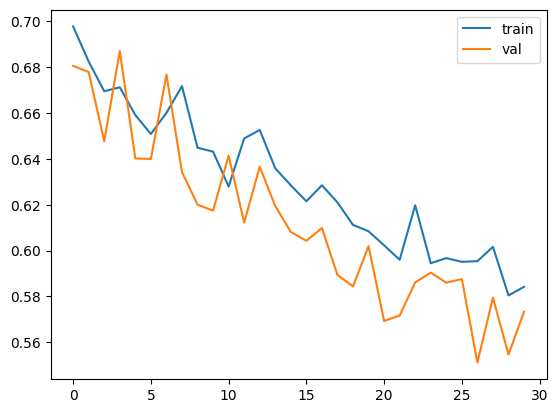

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
print("Train accuracy: ", history.history['acc'][-1])
print("Validation accuracy: ", history.history['val_acc'][-1])
print("Test accuracy: ", end="\n")
test_acc = model.evaluate(test_generator)
plt.legend()

In [ ]:
import numpy as np
for layer in model.layers:
    if isinstance(layer, Dense) or isinstance(layer, Conv2D):
        print(layer.name, np.min(layer.get_weights()[0]), np.max(layer.get_weights()[0]))

fe0 -0.10615093 0.10604122
fe1 -0.1598635 0.16458298
fe2 -0.14987414 0.1433242
fe3 -0.13273238 0.15427764
d1 -0.18729946 0.16405377
d2 -0.0720187 0.07554193


You should run both cases and change the number of epochs to 30 or so and report the validation and test accuracy. Try also to modify the network to get higher accuracy.

# Transfer Learning

In this part of the lab, you will load VGG16 and try to get it to improve the result of this model.

When you use pretrained networks, you have to pay attention to the preprocessing requirements of the inputs.

For example, `Resnet50` requires a minimum of `(200, 200, 3)` image.  Since our cats and dogs example has an image size of `(150, 150, 3)`, one possible solution is to use `UpSampling2D` layer to increase the image to `(300, 300, 3)`.

```python
x = UpSampling2D(size=(2, 2))(x_input)
```

You should definitely read any pre-trained documentation before starting using it. For VGG16, you can find it at https://keras.io/api/applications/vgg/.

All frameworks come with several pretrained models, like VGG, MobileNet, ResNet, and GoogleNet.

In [ ]:
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

In [ ]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# every layer or model with trainable set to false does not
# update weights

vgg16.trainable = False

x_i = Input((150, 150, 3), name="input") # (4, 4, 512)
x = vgg16(x_i)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dropout(0.5, name="drop_input_512")(x)
x = Dense(512, name="d512", activation="relu")(x)
x = Dropout(0.5, name="drop_input_100")(x)
x = Dense(100, name="d100", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_input_512 (Dropout)             │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d512 (Dense)                         │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_input_100 (Dropout)             │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d100 (Dense)                         │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d2 (Dense)                           │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,815,177 (60.33 MB)

 Trainable params: 1,100,489 (4.20 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
new_model = Model(vgg16.inputs, vgg16.get_layer("block2_pool").output)
new_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,160 (1016.25 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 260,160 (1016.25 KB)

drive/MyDrive/train/dog.9835.jpg
(1, 150, 150, 3) (1, 4, 4, 512)


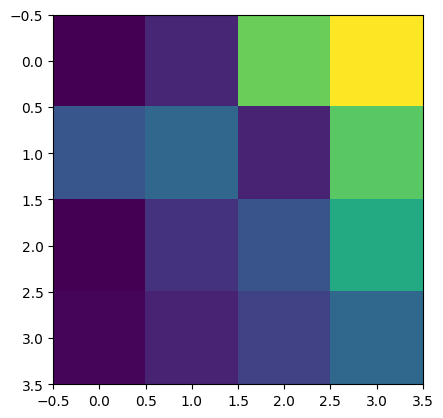

In [ ]:
fname = train_dogs[0]
print(fname)
img = image.load_img(fname, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
output = vgg16(x)
print(x.shape, output.shape)
for i in range(3):
    plt.imshow(output[0][...,i])

Note that in this case, we are not retraining the VGG16 model, just the final dense layers. Why?

In [ ]:
optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["acc"])

history = model.fit(
    train_generator,
    steps_per_epoch=2 * NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=2 * NSAMPLES//(2*100))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - acc: 0.5032 - loss: 0.8669 - val_acc: 0.5760 - val_loss: 0.6760
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - acc: 0.4839 - loss: 0.8202 - val_acc: 0.7140 - val_loss: 0.6258
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.5531 - loss: 0.7198 - val_acc: 0.7030 - val_loss: 0.6138
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.5453 - loss: 0.7046 - val_acc: 0.7600 - val_loss: 0.5992
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.5647 - loss: 0.6987 - val_acc: 0.7620 - val_loss: 0.5879
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - acc: 0.5758 - loss: 0.6880 - val_acc: 0.7780 - val_loss: 0.5716
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.6109 - loss: 0.6628 - val_acc: 0.7850 - val_loss: 0.5603
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - acc: 0.6047 - loss: 0.6800 - val_acc: 0.7840 - val_loss: 0.5584
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - acc: 0.6135 - loss: 

Now, you should change the model above so that the vgg16 is only run before, and you should store the features extracted by vgg16 in memory in order to train the last layers of the network.

In [ ]:
# save images and responses into respective directories so that you do not
# need to keep applying vgg during training loop
import numpy as np

vgg_trained = None
vgg_train_labels = None
vgg_validation = None
vgg_validation_labels = None
total = 0

for data_batch, labels_batch in train_generator:
    total += data_batch.shape[0]
    if vgg_trained is None:
      vgg_trained = vgg16(data_batch)
      vgg_train_labels = labels_batch
    else:
      vgg_trained = np.concatenate((vgg_trained, vgg16(data_batch)))
      vgg_train_labels = np.concatenate((vgg_train_labels, labels_batch))

    if total > 2000:
      break

total = 0
for data_batch, labels_batch in valid_generator:
    total += data_batch.shape[0]
    if vgg_validation is None:
      vgg_validation = vgg16(data_batch)
      vgg_validation_labels = labels_batch
    else:
      vgg_validation = np.concatenate((vgg_validation, vgg16(data_batch)))
      vgg_validation_labels = np.concatenate((vgg_validation_labels, labels_batch))

    if total > 1000:
      break

print(vgg_trained.shape, vgg_train_labels.shape, vgg_validation.shape, vgg_validation_labels.shape)


(2100, 4, 4, 512) (2100,) (1100, 4, 4, 512) (1100,)


In [ ]:
x_i = Input((4, 4, 512), name="input") # (4, 4, 512)
x = MaxPooling2D(2, 2)(x_i)
x = Flatten()(x)
x = Dropout(0.5, name="drop_input_512")(x)
x = Dense(512, name="d512", activation="relu")(x)
x = Dropout(0.5, name="drop_input_100")(x)
x = Dense(100, name="d100", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_input_512 (Dropout)             │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d512 (Dense)                         │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_input_100 (Dropout)             │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d100 (Dense)                         │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d2 (Dense)                           │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,489 (4.20 MB)

 Trainable params: 1,100,489 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["acc"])

history = model.fit(
    vgg_trained,
    vgg_train_labels,
    validation_data=(vgg_validation, vgg_validation_labels),
    batch_size=100, # number of times it executes until it declares epoch is over.
    epochs=30)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.5146 - loss: 0.9456 - val_acc: 0.7000 - val_loss: 0.6031
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.6036 - loss: 0.7050 - val_acc: 0.7200 - val_loss: 0.5611
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.6074 - loss: 0.6586 - val_acc: 0.7264 - val_loss: 0.5386
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.6558 - loss: 0.6236 - val_acc: 0.7709 - val_loss: 0.5072
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7057 - loss: 0.5711 - val_acc: 0.8355 - val_loss: 0.4555
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.7145 - loss: 0.5368 - val_acc: 0.8355 - val_loss: 0.4334
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.7268 - loss: 0.5184 - val_acc: 0.8391 - val_loss: 0.4138
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.7656 - loss: 0.4803 - val_acc: 0.8427 - val_loss: 0.4006
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7614

In Keras, you can set "trainable" attribute for any layer or model. You should traverse vgg16, and try to set the trainable parameter to False before block5, and from block5 forward, it should be set to True.

In [ ]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

for l in vgg16.layers:
    if 'block5' not in l.name:
        l.trainable = False
        print(f'not training layer {l.name}')
    else:
        print(f'training layer {l.name}')

x_i = Input((150, 150, 3), name="input")
x = vgg16(x_i)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dropout(0.5, name="drop_input_512")(x)
x = Dense(512, name="d512", activation="relu")(x)
x = Dropout(0.5, name="drop_input_100")(x)
x = Dense(100, name="d100", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

not training layer input_layer_4
not training layer block1_conv1
not training layer block1_conv2
not training layer block1_pool
not training layer block2_conv1
not training layer block2_conv2
not training layer block2_pool
not training layer block3_conv1
not training layer block3_conv2
not training layer block3_conv3
not training layer block3_pool
not training layer block4_conv1
not training layer block4_conv2
not training layer block4_conv3
not training layer block4_pool
training layer block5_conv1
training layer block5_conv2
training layer block5_conv3
training layer block5_pool


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_input_512 (Dropout)             │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d512 (Dense)                         │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_input_100 (Dropout)             │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d100 (Dense)                         │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d2 (Dense)                           │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,815,177 (60.33 MB)

 Trainable params: 8,179,913 (31.20 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
# train your model
optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["acc"])

history = model.fit(
    train_generator,
    steps_per_epoch=2 * NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=2 * NSAMPLES//(2*100))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 941s 48s/step - acc: 0.4760 - loss: 0.9161 - val_acc: 0.5700 - val_loss: 0.6646
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 927s 45s/step - acc: 0.5442 - loss: 0.7180 - val_acc: 0.7480 - val_loss: 0.6224
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 856s 43s/step - acc: 0.5914 - loss: 0.6590 - val_acc: 0.8130 - val_loss: 0.5650
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 856s 43s/step - acc: 0.6611 - loss: 0.6207 - val_acc: 0.8340 - val_loss: 0.4831
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 826s 42s/step - acc: 0.7025 - loss: 0.5619 - val_acc: 0.8510 - val_loss: 0.3977
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 865s 42s/step - acc: 0.7855 - loss: 0.4882 - val_acc: 0.8650 - val_loss: 0.3253
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 847s 43s/step - acc: 0.7942 - loss: 0.4499 - val_acc: 0.8800 - val_loss: 0.2832
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 868s 43s/step - acc: 0.8300 - loss: 0.3989 - val_acc: 0.8860 - val_loss: 0.2770
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 934s 47s/step - ac

You should also try to use resnet50 and mobilenetv2.  You will need to use the appropriate `preprocess_function` function for each of the networks.

Remember also that for resnet50, you need to use an image of `(300, 300, 3)` and to use `UpSampling2D` before invoking resnet50 block.

The documentations can be found at https://keras.io/api/applications/

Report the best results you obtained, and plot the loss and accuracy of your experiments.

In [ ]:
# resnet code
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow import keras

resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(300, 300, 3))

resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 300, 300, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 306, 306, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 150, 150, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 150, 150, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 150, 150, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 152, 152, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 75, 75, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 75, 75, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 75, 75, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 75, 75, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 75, 75, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 75, 75, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 75, 75, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 75, 75, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 75, 75, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
resnet.trainable = False

x_i = Input((150, 150, 3), name="input") # (4, 4, 512)
x = UpSampling2D(size=(2, 2))(x_i)
x = keras.applications.resnet50.preprocess_input(x)
x = resnet(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dropout(0.25, name="drop_input_512")(x)
x = Dense(512, name="d512", activation="relu")(x)
x = Dropout(0.25, name="drop_input_100")(x)
x = Dense(100, name="d100", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 300, 300, 3)    │              0 │ input[0][0]            │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 300, 300)       │              0 │ up_sampling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 300, 300)       │              0 │ up_sampling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 300, 300)       │              0 │ up_sampling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 300, 300, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 300, 300, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 10, 10, 2048)   │     23,587,712 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 5, 5, 2048)     │              0 │ resnet50[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 51200)          │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ drop_input_512 (Dropout)  │ (None, 51200)          │              0 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ d512 (Dense)              │ (None, 512)            │     26,214,912 │ drop_input_512[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ drop_input_100 (Dropout)  │ (None, 512)            │              0 │ d512[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ d100 (Dense)              │ (None, 100)            │         51,300 │ drop_input_100[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ d2 (Dense)                │ (None, 1)              │            101 │ d100[0][0]             │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 49,854,025 (190.18 MB)

 Trainable params: 26,266,313 (100.20 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["acc"])

history = model.fit(
    train_generator,
    steps_per_epoch=2 * NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=2 * NSAMPLES//(2*100))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - acc: 0.4890 - loss: 6.7571 - val_acc: 0.5000 - val_loss: 0.7570
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - acc: 0.5114 - loss: 1.6511 - val_acc: 0.6450 - val_loss: 0.6689
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.5028 - loss: 1.1179 - val_acc: 0.5000 - val_loss: 0.8713
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - acc: 0.5074 - loss: 0.8961 - val_acc: 0.6120 - val_loss: 0.6793
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - acc: 0.4979 - loss: 0.7800 - val_acc: 0.5000 - val_loss: 0.6830
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - acc: 0.5050 - loss: 0.7431 - val_acc: 0.5310 - val_loss: 0.6833
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - acc: 0.5070 - loss: 0.7451 - val_acc: 0.5000 - val_loss: 0.6868
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - acc: 0.5225 - loss: 0.7043 - val_acc: 0.5000 - val_loss: 0.6803
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - acc: 0.5251 - loss: 

In [ ]:
# mobilenetv2 code
from tensorflow.keras.applications import MobileNetV2
from tensorflow import keras

mb_v2 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150,150,3))
mb_v2.summary()

<ipython-input-19-26dedf46a94e>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mb_v2 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150,150,3))


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 75, 75, 32)     │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 75, 75, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 75, 75, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 75, 75, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 75, 75, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 75, 75, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 75, 75, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 75, 75, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 75, 75, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 77, 77, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 38, 38, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
mb_v2.trainable = False

x_i = Input((150, 150, 3), name="input") # (4, 4, 512)
x = keras.applications.mobilenet_v2.preprocess_input(x_i)
x = mb_v2(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dropout(0.5, name="drop_input_512")(x)
x = Dense(512, name="d512", activation="relu")(x)
x = Dropout(0.5, name="drop_input_100")(x)
x = Dense(100, name="d100", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 1280)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_input_512 (Dropout)             │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d512 (Dense)                         │ (None, 512)                 │       2,621,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_input_100 (Dropout)             │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d100 (Dense)                         │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d2 (Dense)                           │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,931,337 (18.81 MB)

 Trainable params: 2,673,353 (10.20 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["acc"])

history = model.fit(
    train_generator,
    steps_per_epoch=2 * NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=2 * NSAMPLES//(2*100))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - acc: 0.5057 - loss: 2.3520 - val_acc: 0.5000 - val_loss: 1.2612
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - acc: 0.4972 - loss: 0.9980 - val_acc: 0.5000 - val_loss: 0.7761
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.5014 - loss: 0.8010 - val_acc: 0.5020 - val_loss: 0.6910
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.4723 - loss: 0.7719 - val_acc: 0.5350 - val_loss: 0.6909
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.4583 - loss: 0.7488 - val_acc: 0.5000 - val_loss: 0.6949
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.5142 - loss: 0.7180 - val_acc: 0.5020 - val_loss: 0.6915
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.5022 - loss: 0.7229 - val_acc: 0.5000 - val_loss: 0.6935
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - acc: 0.5069 - loss: 0.7109 - val_acc: 0.5000 - val_loss: 0.6916
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - acc: 0.4935 - loss: 

# Hyperparameter Tuning Using KerasTuner (AutoML)

In this lab, you will perform hyperparameter tuning using KerasTuner.

You will fine tune a model to try to outperform other models.

To install keras tuner, you need to do.

```shell
pip3 install keras-tuner
```

In [ ]:
# you may need to uninstall and reinstall protobuffer to get the latest version of keras tuner.

!yes | pip3 uninstall protobuf python3-protobuf
!pip3 install --upgrade protobuf
!pip3 install keras-tuner --upgrade

Found existing installation: protobuf 4.25.6
Uninstalling protobuf-4.25.6:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/google/_upb/_message.abi3.so
    /usr/local/lib/python3.11/dist-packages/google/protobuf/*
    /usr/local/lib/python3.11/dist-packages/protobuf-4.25.6.dist-info/*
Proceed (Y/n)?   Successfully uninstalled protobuf-4.25.6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.4 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
import keras_tuner as kt

(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

(28, 28)


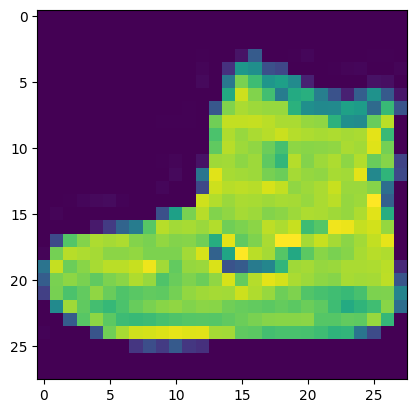

In [ ]:
print(img_train[0].shape)
plt.imshow(img_train[0].reshape(28,28,1))

In [ ]:
import tensorflow as tf

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512

  # 8 x 6 x 3 x 3 ~ 500 options

  for i in range(hp.Int('layers', 3, 10)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), 50, 100, step=10),
            activation=hp.Choice('act_' + str(i), ['relu', 'swish', 'gelu'])))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])

  return model

In [ ]:
mode = 'random'
keras_tuner_dir = 'kt_dir'

try:
    shutil.rmtree(keras_tuner_dir)
except:
    pass

if mode == 'hyperband':
    tuner = kt.Hyperband(
        model_builder,
        objective = 'val_accuracy',
        max_epochs = 10,
        factor = 3,
        directory = keras_tuner_dir,
        project_name = 'intro_to_kt_hyperband')
else:
    tuner = kt.RandomSearch(
        model_builder,
        objective='val_accuracy',
        max_trials=10,
        executions_per_trial=1,
        directory=keras_tuner_dir,
        project_name='intro_kt_random')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
tuner.search(
    img_train, label_train,
    batch_size=64,
    epochs = 5,
    validation_data = (img_test, label_test),
    callbacks = [])

Trial 10 Complete [00h 00m 32s]
val_accuracy: 0.8377000093460083

Best val_accuracy So Far: 0.8758999705314636
Total elapsed time: 00h 04m 45s


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

n_layers = best_hps.get('layers')
print(n_layers)
print()
for i in range(n_layers):
    print(best_hps.get('units_' + str(i)), best_hps.get('act_' + str(i)))
print(best_hps.get('learning_rate'))

5

80 gelu
90 relu
100 relu
100 relu
60 relu
0.001


Keras tuner has three optimizers.

- RandomSearch
- BayesianOptimization (Gaussian Processes)
- Hyperband

In the code, we showed how to start random search and hyperband.

Usually, you use the following parameters in Keras Tuner.

- hp.Boolean
- hp.Int
- hp.Float
- hp.Choice
- hp.Fixed
- hp.Float
- Conditional scope

You can find more information in https://keras.io/keras_tuner/

Now you can tune your VGG network from Section 1 to see which model will get the best performance.

In [ ]:
def vgg_model_builder(hp):
  model = keras.Sequential()
  model.add(Input((150, 150, 3), name="input")) # (4, 4, 512)
  model.add(VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3)))
  model.add(MaxPooling2D(2, 2))
  model.add(Flatten())

  for i in range(hp.Int('layers', 3, 7)):
        model.add(Dropout(rate=hp.Choice('dropout_' + str(i), [0.25, 0.375, 0.5])))
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), 50, 100, step=10),
            activation=hp.Choice('act_' + str(i), ['relu', 'swish', 'gelu'])))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
  model.add(Dense(1, name="d2", activation="sigmoid"))

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

In [ ]:
mode = 'random'
keras_tuner_dir = 'kt_dir'

try:
    shutil.rmtree(keras_tuner_dir)
except:
    pass

if mode == 'hyperband':
    tuner = kt.Hyperband(
        vgg_model_builder,
        objective = 'val_accuracy',
        max_epochs = 10,
        factor = 3,
        directory = keras_tuner_dir,
        project_name = 'intro_to_kt_hyperband')
else:
    tuner = kt.RandomSearch(
        vgg_model_builder,
        objective='val_accuracy',
        max_trials=10,
        executions_per_trial=1,
        directory=keras_tuner_dir,
        project_name='intro_kt_random')

In [ ]:
import numpy as np

vgg_train, label_train, vgg_valid, label_valid = None, None, None, None
total = 0

for data_batch, label_batch in train_generator:
  if vgg_train is None:
    vgg_train = data_batch
    label_train = label_batch
  else:
    vgg_train = np.concatenate((vgg_train, data_batch))
    label_train = np.concatenate((label_train, label_batch))

  total += data_batch.shape[0]
  print(total)
  if total >= 2000:
    break

print(vgg_train.shape)
print(label_train.shape)
total = 0

for data_batch, label_batch in valid_generator:
  if vgg_valid is None:
    vgg_valid = data_batch
    label_valid = label_batch
  else:
    vgg_valid = np.concatenate((vgg_valid, data_batch))
    label_valid = np.concatenate((label_valid, label_batch))

  total += data_batch.shape[0]
  print(total)
  if total >= 1000:
    break

print(vgg_valid.shape)
print(label_valid.shape)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
(2000, 150, 150, 3)
(2000,)
100
200
300
400
500
600
700
800
900
1000
(1000, 150, 150, 3)
(1000,)


In [ ]:
tuner.search(
    vgg_train, label_train,
    batch_size=100,
    epochs = 5,
    validation_data = (vgg_valid, label_valid),
    callbacks = [])

Trial 10 Complete [00h 02m 11s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5889999866485596
Total elapsed time: 00h 23m 05s


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

n_layers = best_hps.get('layers')
print(n_layers)
print()
for i in range(n_layers):
    print(best_hps.get('units_' + str(i)), best_hps.get('act_' + str(i)), best_hps.get('dropout_' + str(i)))
print(best_hps.get('learning_rate'))

4

80 swish 0.5
80 swish 0.375
50 relu 0.5
50 relu 0.25
0.001
